# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [118]:
# Carregar e importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [119]:
# 1) Carregar o arquivo
df = pd.read_csv('sinasc_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [120]:
# Vamos alterar a categorização da variável 'CONSULTAS',
# de acordo com o dicionário de variáveis
df['CONSULTAS'].value_counts()

4    18624
3     5988
2     1379
1      986
9       51
Name: CONSULTAS, dtype: int64

In [121]:
df.loc[df['CONSULTAS'] == 1, 'CONSULTAS'] = 'Nenhuma'
df.loc[df['CONSULTAS'] == 2, 'CONSULTAS'] = 'De 1 a 3'
df.loc[df['CONSULTAS'] == 3, 'CONSULTAS'] = 'De 4 a 6'
df.loc[df['CONSULTAS'] == 4, 'CONSULTAS'] = '7 e mais'
df.loc[df['CONSULTAS'] == 9, 'CONSULTAS'] = 'Ignorado'

In [122]:
df['CONSULTAS'].value_counts()

7 e mais    18624
De 4 a 6     5988
De 1 a 3     1379
Nenhuma       986
Ignorado       51
Name: CONSULTAS, dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

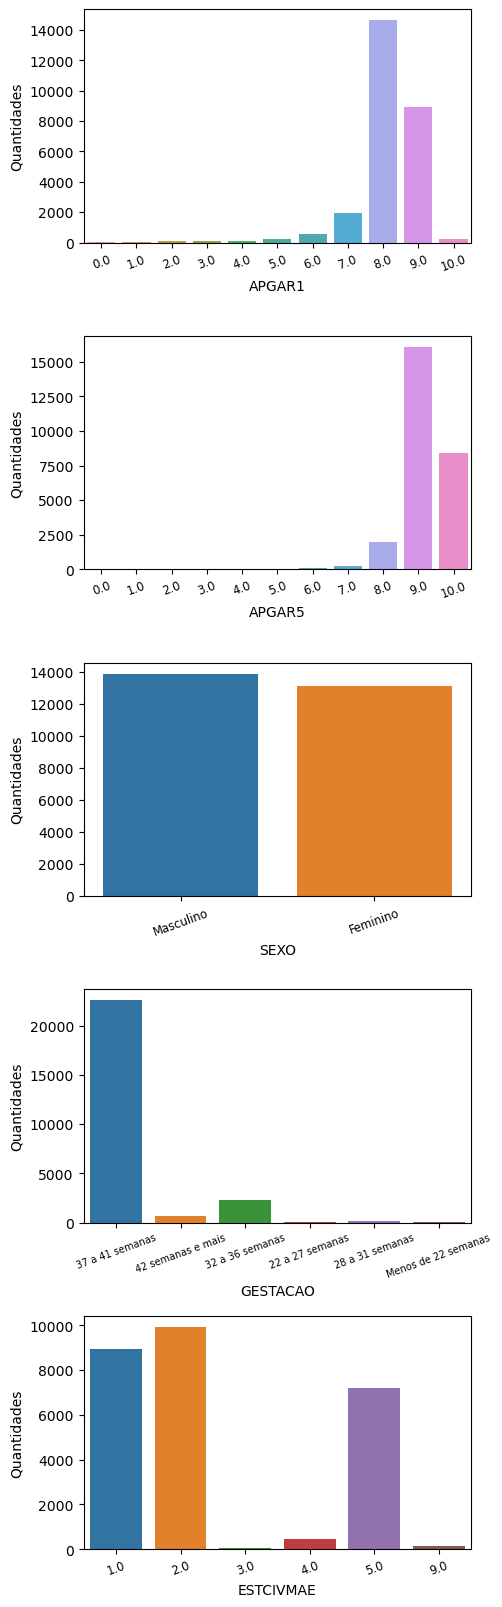

In [123]:
# 2)
fig, axes = plt.subplots(5, 1, figsize = (5, 20))

sns.countplot(ax = axes[0], x = 'APGAR1', data = df)
sns.countplot(ax = axes[1], x = 'APGAR5', data = df)
sns.countplot(ax = axes[2], x = 'SEXO', data = df)
sns.countplot(ax = axes[3], x = 'GESTACAO', data = df)
sns.countplot(ax = axes[4], x = 'ESTCIVMAE', data = df);

for i in range(5):
    axes[i].set_ylabel('Quantidades') # mudar o título do eixo y
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 20, fontsize = 'small') # rotacionar os tiques

axes[3].set_xticklabels(axes[3].get_xticklabels(), 
                        rotation = 20, fontsize = 7) # diminuir o tamanho da fonte
plt.subplots_adjust(wspace = 0, hspace = 0.4) # alterar o espaçamento entre os eixos
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

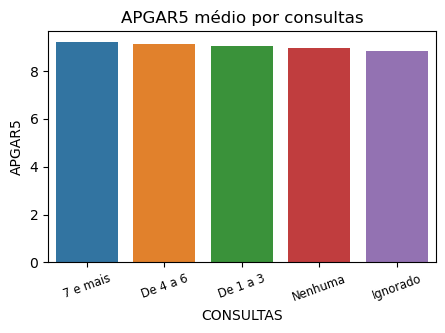

In [124]:
# 3)
plt.close('all')
fig, ax = plt.subplots(figsize = (5, 3))

sns.barplot(ax = ax, x = 'CONSULTAS', y = 'APGAR5', data = df, ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, fontsize = 'small')
ax.set_title('APGAR5 médio por consultas')

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

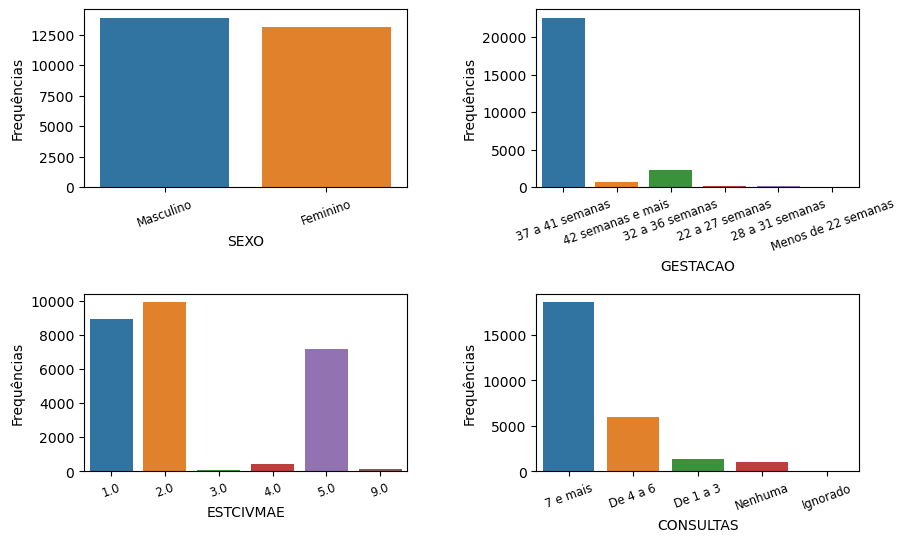

In [125]:
# 4)
plt.close('all')
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

sns.countplot(ax = axes[0, 0], x = 'SEXO', data = df)
sns.countplot(ax = axes[0, 1], x = 'GESTACAO', data = df)
sns.countplot(ax = axes[1, 0], x = 'ESTCIVMAE', data = df)
sns.countplot(ax = axes[1, 1], x = 'CONSULTAS', data = df)

for i in range(2):
    for j in range(2):
        axes[i, j].set_ylabel('Frequências') # mudar o título do eixo y
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation = 20, fontsize = 'small') # rotacionar os tiques

plt.subplots_adjust(wspace = 0.4, hspace = 0.6) # alterar o espaçamento entre os eixos
plt.show()